In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import sqlite3
import matplotlib.pyplot as plt

In [71]:
conn = sqlite3.connect("../database.db")

df = pd.read_sql("SELECT * FROM Ticker_1H WHERE Ticker = 'MSFT'", con=conn)
df.head()

,Datetime,Open,High,Low,Close,Volume,Ticker,InsertTime
0,2024-01-16 09:30:00.000000,392.750000,393.700012,389.470001,392.119995,8262760,MSFT,2026-01-13 11:05:14.285670
1,2024-01-16 10:30:00.000000,392.095001,393.220001,390.320007,391.649994,3330125,MSFT,2026-01-13 11:05:14.285670
2,2024-01-16 11:30:00.000000,391.690002,392.319885,389.730011,389.779999,2038955,MSFT,2026-01-13 11:05:14.285670
3,2024-01-16 12:30:00.000000,389.760010,390.000000,387.622894,389.010010,2296409,MSFT,2026-01-13 11:05:14.285670
4,2024-01-16 13:30:00.000000,389.019989,389.750000,388.000000,388.662994,1597837,MSFT,2026-01-13 11:05:14.285670


In [72]:
df["ATR"] = ta.atr(df.High, df.Low, df.Close)
df["EMA14"] = ta.ema(df.Close, length=14)
df["EMA28"] = ta.ema(df.Close, length=50)
df[["Bollinger Low", "Bollinger Mid", "Bollinger High"]] = ta.bbands(df.Close)[["BBL_5_2.0_2.0", "BBM_5_2.0_2.0", "BBU_5_2.0_2.0"]]
df["AO"] = ta.ao(df.High, df.Low)

df = df.dropna()

df

,Datetime,Open,High,Low,Close,Volume,Ticker,InsertTime,ATR,EMA14,EMA28,Bollinger Low,Bollinger Mid,Bollinger High,AO
49,2024-01-25 09:30:00.000000,403.750000,406.674988,403.364990,405.959991,4825028,MSFT,2026-01-13 11:05:14.285670,2.170735,401.676422,395.115834,400.600145,403.909998,407.219850,6.421677
50,2024-01-25 10:30:00.000000,406.000000,407.010010,405.380005,406.416992,2147873,MSFT,2026-01-13 11:05:14.285670,2.132112,402.308498,395.559016,400.273279,404.101398,407.929517,6.263502
51,2024-01-25 11:30:00.000000,406.410004,406.839996,404.890015,405.432007,1995993,MSFT,2026-01-13 11:05:14.285670,2.119102,402.724965,395.946193,400.974605,404.627802,408.280998,6.198760
52,2024-01-25 12:30:00.000000,405.479614,406.179993,404.670013,405.450012,1911876,MSFT,2026-01-13 11:05:14.285670,2.075594,403.088305,396.318891,402.151502,405.165802,408.180102,6.258934
53,2024-01-25 13:30:00.000000,405.429688,405.429688,402.700012,403.200012,2016883,MSFT,2026-01-13 11:05:14.285670,2.123766,403.103199,396.588739,402.815353,405.291803,407.768253,6.168084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,2026-01-12 13:30:00.000000,478.510010,479.290009,477.869995,479.140015,903532,MSFT,2026-01-13 11:05:14.285670,2.356175,478.614606,479.353003,478.147237,478.697943,479.248650,0.056817
3474,2026-01-12 14:30:00.000000,479.149994,480.660004,479.049988,479.239990,1192696,MSFT,2026-01-13 11:05:14.285670,2.302878,478.697990,479.348571,478.128931,478.831122,479.533313,0.170111
3475,2026-01-12 15:30:00.000000,479.230011,479.230011,476.700012,477.190002,1711089,MSFT,2026-01-13 11:05:14.285670,2.319813,478.496925,479.263921,476.876433,478.512000,480.147566,-0.194739
3476,2026-01-13 09:30:00.000000,474.674988,475.760010,467.609985,468.239990,4239307,MSFT,2026-01-13 11:05:14.285670,2.838399,477.129334,478.831610,467.124720,476.467999,485.811278,-1.643049


In [73]:
# df = df[["Datetime", "Open", "High", "Low", "Close", "Volume"]]
df = df.drop(columns=["Ticker","InsertTime"])
df["Datetime"] = pd.to_datetime(df["Datetime"])
df = df.set_index("Datetime")
df.head()

,Open,High,Low,Close,Volume,ATR,EMA14,EMA28,Bollinger Low,Bollinger Mid,Bollinger High,AO
Datetime,,,,,,,,,,,,
2024-01-25 09:30:00,403.750000,406.674988,403.364990,405.959991,4825028,2.170735,401.676422,395.115834,400.600145,403.909998,407.219850,6.421677
2024-01-25 10:30:00,406.000000,407.010010,405.380005,406.416992,2147873,2.132112,402.308498,395.559016,400.273279,404.101398,407.929517,6.263502
2024-01-25 11:30:00,406.410004,406.839996,404.890015,405.432007,1995993,2.119102,402.724965,395.946193,400.974605,404.627802,408.280998,6.198760
2024-01-25 12:30:00,405.479614,406.179993,404.670013,405.450012,1911876,2.075594,403.088305,396.318891,402.151502,405.165802,408.180102,6.258934
2024-01-25 13:30:00,405.429688,405.429688,402.700012,403.200012,2016883,2.123766,403.103199,396.588739,402.815353,405.291803,407.768253,6.168084


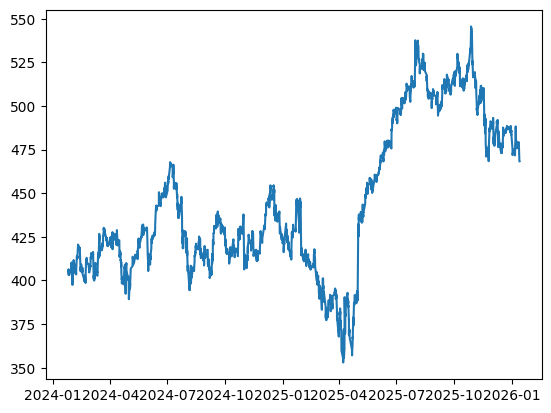

In [74]:
plt.plot(df.index, df.Close)

In [75]:
from sklearn.preprocessing import StandardScaler

train_size = 2800
val_size = 300

df_np = df.to_numpy()
scale_to = df.to_numpy()[:train_size]
labels = df.Close.to_numpy()

scaler = StandardScaler()
scaler.fit(scale_to)

df_np = scaler.transform(df_np)

In [78]:
def create_window(predictors, labels, window_size=5):
    df_np = predictors
    X = []
    y = []


    for i in range(len(df_np) - (2*window_size)):
        row = np.array([[a] for a in df_np[i:i+window_size]]).reshape(window_size, predictors.shape[1]) # Does [[a] [b] [c]...]
        label = [label for label in labels[i+window_size:i+(2*window_size)]]

        X.append(row)
        y.append(label)

    return np.array(X), np.array(y)

In [79]:
X, y = create_window(df_np, labels, 5)
X.shape, y.shape

((3419, 5, 12), (3419, 5))

In [81]:
X_train = X[:train_size]
y1_train, y2_train, y3_train, y4_train, y5_train = y[:train_size, 0], y[:train_size, 1], y[:train_size, 2], y[:train_size, 3], y[:train_size, 4]
X_val = X[train_size:train_size+val_size] 
y1_val, y2_val, y3_val, y4_val, y5_val = y[train_size:train_size+val_size, 0], y[train_size:train_size+val_size, 1], y[train_size:train_size+val_size, 2], y[train_size:train_size+val_size, 3], y[train_size:train_size+val_size, 4]
X_test = X[train_size+val_size:]
y1_test, y2_test, y3_test, y4_test, y5_test,  = y[train_size+val_size:, 0], y[train_size+val_size:, 1], y[train_size+val_size:, 2], y[train_size+val_size:, 3], y[train_size+val_size:, 4]

X_train.shape, y1_train.shape, X_val.shape, y1_val.shape, X_test.shape, y1_test.shape

((2800, 5, 12), (2800,), (300, 5, 12), (300,), (319, 5, 12), (319,))

In [ ]:
# X_train, y_train = X_train.reshape(X_train.shape[:3]), y_train.reshape(y_train.shape[:3])
# X_val, y_val = X_val.reshape(X_val.shape[:3]), y_val.reshape(y_val.shape[:3])
# X_test, y_test = X_test.reshape(X_test.shape[:3]), y_test.reshape(y_test.shape[:3])

# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2800, 5, 1), (2800, 1), (300, 5, 1), (300, 1), (373, 5, 1), (373, 1))

In [30]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [94]:

input_layer = Input(X_train.shape[1:], name="input")

x = LSTM(256)(input_layer)
x = Dense(64, "relu")(x)
x = Dense(8, "relu")(x)

output_1 = Dense(1, "linear", name="1_future")(x)
output_2 = Dense(1, "linear", name="2_future")(x)
output_3 = Dense(1, "linear", name="3_future")(x)
output_4 = Dense(1, "linear", name="4_future")(x)
output_5 = Dense(1, "linear", name="5_future")(x)

model2 = Model(inputs=input_layer, outputs=[output_1, output_2, output_3, output_4, output_5])

model2.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 5, 12)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_12 (LSTM)      │ (None, 256)       │    275,456 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 64)        │     16,448 │ lstm_12[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 8)         │        520 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1_future (Dense)    │ (None, 1)         │          9 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2_future (Dense)    │ (None, 1)         │          9 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 3_future (Dense)    │ (None, 1)         │          9 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 4_future (Dense)    │ (None, 1)         │          9 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 5_future (Dense)    │ (None, 1)         │          9 │ dense_26[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 292,469 (1.12 MB)

 Trainable params: 292,469 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
mcp = ModelCheckpoint("model1/best_model.keras", save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001))
model2.fit(X_train, [y1_train, y2_train, y3_train, y4_train, y5_train], 
           validation_data=(X_val, [y1_val, y2_val, y3_val, y4_val, y5_val]), 
           epochs=100, callbacks=[mcp])

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - 1_future_loss: 167692.9062 - 2_future_loss: 147929.3750 - 3_future_loss: 152428.8281 - 4_future_loss: 167239.2031 - 5_future_loss: 150692.2656 - loss: 787774.1875 - val_1_future_loss: 175337.6094 - val_2_future_loss: 161979.3594 - val_3_future_loss: 204972.2969 - val_4_future_loss: 259392.6250 - val_5_future_loss: 141503.4219 - val_loss: 942671.8125
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 1_future_loss: 57861.0508 - 2_future_loss: 26079.6328 - 3_future_loss: 42025.9922 - 4_future_loss: 73933.0234 - 5_future_loss: 18878.6016 - loss: 219591.1562 - val_1_future_loss: 19515.9414 - val_2_future_loss: 13448.2061 - val_3_future_loss: 65232.6055 - val_4_future_loss: 153198.5938 - val_5_future_loss: 192.5662 - val_loss: 251385.0938
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 1_future_loss: 7327.3379 - 2_future_loss: 1219.3541 - 3_future_loss: 9377.1865 - 4_future_loss: 27759.3633 - 5_future_loss: 3093.1421 - loss: 48896

In [96]:
from tensorflow.keras.models import load_model

model1_loaded = load_model("model1/best_model.keras")

In [97]:
y1_pred = model1_loaded.predict(X_test)[0].flatten()
y2_pred = model1_loaded.predict(X_test)[1].flatten()
y3_pred = model1_loaded.predict(X_test)[2].flatten()
y4_pred = model1_loaded.predict(X_test)[3].flatten()
y5_pred = model1_loaded.predict(X_test)[4].flatten()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [98]:
train_true = np.full((len(X)), np.nan)
val_true = np.full((len(X)), np.nan)
test_true = np.full((len(X)), np.nan)

test_pred_1 = np.full((len(X)), np.nan)
test_pred_2 = np.full((len(X)), np.nan)
test_pred_3 = np.full((len(X)), np.nan)
test_pred_4 = np.full((len(X)), np.nan)
test_pred_5 = np.full((len(X)), np.nan)

train_true[:train_size] = y1_train.flatten()
val_true[train_size:train_size+val_size] = y1_val.flatten()
test_true[train_size+val_size:] = y1_test.flatten()

test_pred_1[train_size+val_size:] = y1_pred
test_pred_2[train_size+val_size:] = y2_pred
test_pred_3[train_size+val_size:] = y3_pred
test_pred_4[train_size+val_size:] = y4_pred
test_pred_5[train_size+val_size:] = y5_pred


In [99]:
graph_df = pd.DataFrame({
    "Train-True": train_true, 
    "Val-True": val_true, 
    "Test-True": test_true, 
    "Test-Preds-1": test_pred_1, 
    "Test-Preds-2": test_pred_2, 
    "Test-Preds-3": test_pred_3, 
    "Test-Preds-4": test_pred_4, 
    "Test-Preds-5": test_pred_5})
graph_df

,Train-True,Val-True,Test-True,Test-Preds-1,Test-Preds-2,Test-Preds-3,Test-Preds-4,Test-Preds-5
0,403.470001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,405.089996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,404.640015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,405.345001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,405.119995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3414,NaN,NaN,479.200012,479.641876,479.871063,479.749084,479.584015,479.777588
3415,NaN,NaN,478.574097,480.122070,480.350922,480.233704,480.073090,480.266235
3416,NaN,NaN,478.785614,479.794617,480.022583,479.911255,479.757721,479.950836
3417,NaN,NaN,478.459991,480.342224,480.570679,480.458710,480.305145,480.499359


<Axes: >

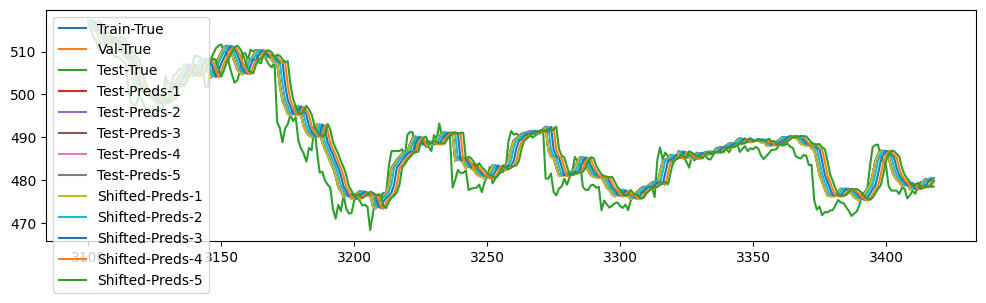

In [110]:
graph_df.iloc[train_size+val_size:, :].plot(figsize=(12, 3))

In [109]:
graph_df["Train-True"].shift(1)

0              NaN
1       403.470001
2       405.089996
3       404.640015
4       405.345001
           ...    
3414           NaN
3415           NaN
3416           NaN
3417           NaN
3418           NaN
Name: Train-True, Length: 3419, dtype: float64

<Axes: >

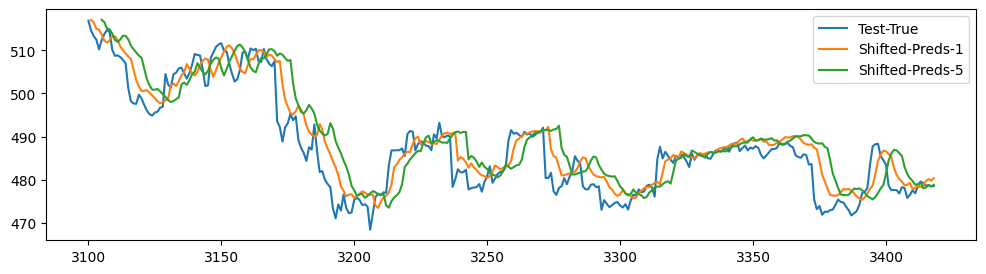

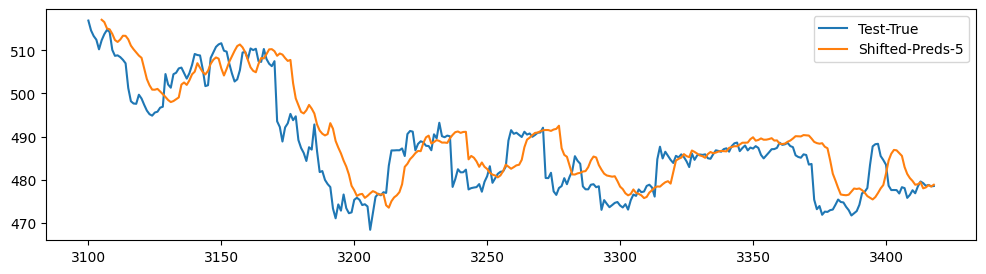

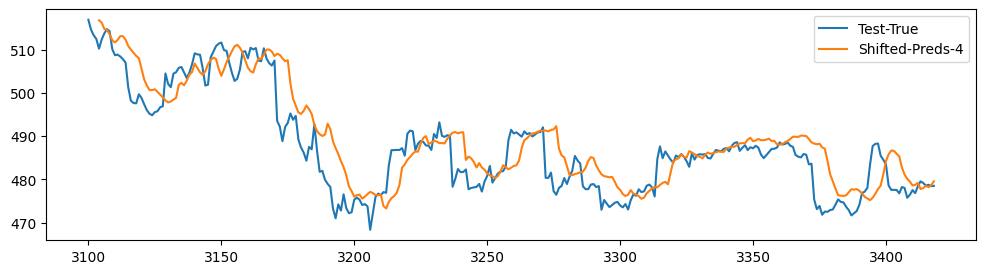

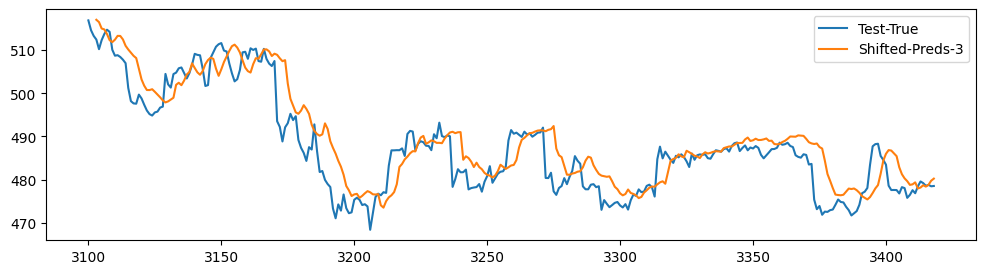

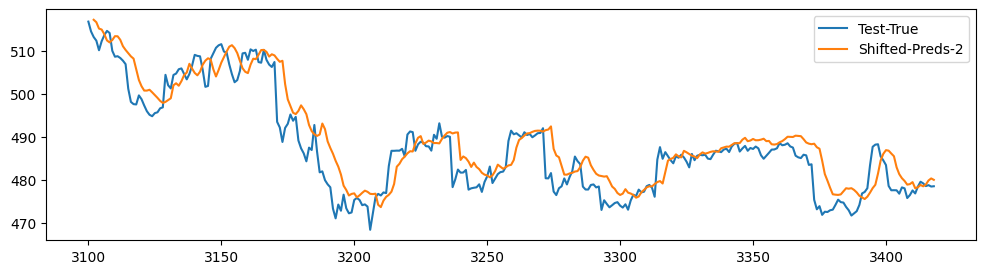

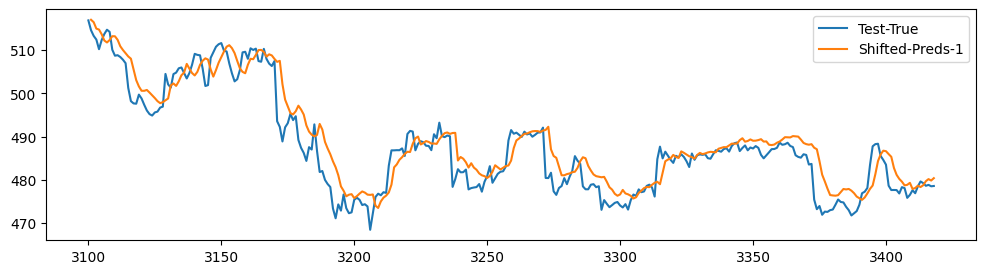

In [111]:
graph_df["Shifted-Preds-1"] = graph_df["Test-Preds-1"].shift(1)
graph_df["Shifted-Preds-2"] = graph_df["Test-Preds-2"].shift(2)
graph_df["Shifted-Preds-3"] = graph_df["Test-Preds-3"].shift(3)
graph_df["Shifted-Preds-4"] = graph_df["Test-Preds-4"].shift(4)
graph_df["Shifted-Preds-5"] = graph_df["Test-Preds-5"].shift(5)

graph_df[["Test-True", "Shifted-Preds-1", "Shifted-Preds-5"]].iloc[train_size+val_size:].plot(figsize=(12, 3))

graph_df[["Test-True", "Shifted-Preds-5"]].iloc[train_size+val_size:].plot(figsize=(12, 3))
graph_df[["Test-True", "Shifted-Preds-4"]].iloc[train_size+val_size:].plot(figsize=(12, 3))
graph_df[["Test-True", "Shifted-Preds-3"]].iloc[train_size+val_size:].plot(figsize=(12, 3))
graph_df[["Test-True", "Shifted-Preds-2"]].iloc[train_size+val_size:].plot(figsize=(12, 3))
graph_df[["Test-True", "Shifted-Preds-1"]].iloc[train_size+val_size:].plot(figsize=(12, 3))